In [1]:
import pandas as pd
import tqdm
import pickle
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
clinical_meta = pd.read_csv("/home/ubuntu/metadata_latest_oct5.csv",low_memory=False)
meta_obs = pd.read_csv("/home/ubuntu/MSSM_meta_obs.csv")
meta_obs.index = meta_obs.barcodekey

In [3]:
phen="c07x"

In [ ]:
clinical_meta = clinical_meta.dropna(subset = [phen])

donors = clinical_meta["SubID"].to_list()

meta_obs = meta_obs[meta_obs["SubID"].isin(donors)]

donors_meta = pd.merge(meta_obs, clinical_meta[[f"{phen}","SubID"]], left_on="SubID", right_on="SubID")
donors_meta.index = meta_obs.index

<Axes: >

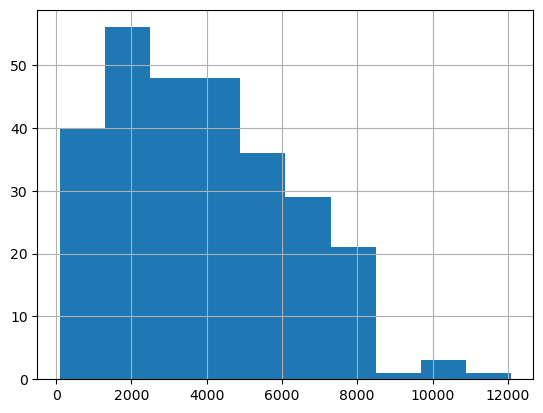

In [8]:
donors_meta["SubID"].value_counts().hist()

In [9]:
len(donors_meta["SubID"].unique())

283

In [10]:
sum(donors_meta["SubID"].value_counts()<1000)

28

In [11]:
donor_subset = donors_meta["SubID"].value_counts()[donors_meta["SubID"].value_counts()>1000].index

In [12]:
donors_meta = donors_meta[donors_meta["SubID"].isin(donor_subset)]

In [13]:
donors_meta = donors_meta[["barcodekey","SubID", f"{phen}"]]

In [14]:
donors_meta = donors_meta.drop_duplicates(subset=["SubID"])

In [15]:
donors_meta.shape

(255, 3)

In [21]:
train_df, val_df = train_test_split(
    donors_meta,
    test_size=0.2,
    stratify=donors_meta[f"{phen}"],
    random_state=42
)

In [22]:
phenotypes = donors_meta[phen].unique()
phenotypes

array(['SCZ', 'Control'], dtype=object)

In [23]:
print("Cells (train):", len(train_df), "  Donors (val):", len(val_df))
print("Phenotype ratio (train):")
print(train_df[f"{phen}"].value_counts(normalize=True),train_df[f"{phen}"].value_counts())
print("Phenotype ratio (val):")
print(val_df[f"{phen}"].value_counts(normalize=True), val_df[f"{phen}"].value_counts())

train_df = train_df[["SubID",f"{phen}"]]

train_df["barcodekey"] = train_df.index
train_df

val_df = val_df[["SubID",f"{phen}"]]

val_df["barcodekey"] = val_df.index
val_df

train_df[phen] = train_df[phen].map({"SCZ":1, "Control":0})
val_df[phen] = val_df[phen].map({"SCZ":1, "Control":0})

data={"train": train_df, "test": val_df}

Cells (train): 204   Donors (val): 51
Phenotype ratio (train):
c07x
Control    0.661765
SCZ        0.338235
Name: proportion, dtype: float64 c07x
Control    135
SCZ         69
Name: count, dtype: int64
Phenotype ratio (val):
c07x
Control    0.666667
SCZ        0.333333
Name: proportion, dtype: float64 c07x
Control    34
SCZ        17
Name: count, dtype: int64


In [25]:
with open(f"/home/ubuntu/scripts/Train_cv_to_send/Donor-level_Phenotype_classification_files/{phen}_split_seed42.pkl", 'wb') as handle:
    pickle.dump(data,handle)

In [24]:
train_df.head()

,SubID,c07x,barcodekey
barcodekey,,,
M47734-2-AAACCCAAGCCTTTGA-0,M47734,0,M47734-2-AAACCCAAGCCTTTGA-0
M8926-1-AAACCCATCGCTGACG-0,M8926,0,M8926-1-AAACCCATCGCTGACG-0
M55015-3-AAACCCAAGAGTAACT-0,M55015,0,M55015-3-AAACCCAAGAGTAACT-0
M69984-1-AAACCCAAGATCGCTT-0,M69984,0,M69984-1-AAACCCAAGATCGCTT-0
M54529-1-AAACCCAGTGCCAAGA-0,M54529,1,M54529-1-AAACCCAGTGCCAAGA-0
